# Natural Language Process - Celebrity Interviews Project Part 1

This is a Natural Language Process project where we want to analyse Interview texts of Footballers and Hollywood celebrities that were conducted in the year 2022 using Natural Language Processing techniques. Our dataset consists of interview texts of 24 Professional Footballers and 24 Hollywood Celebrities. Our Project series will be divided into 4 parts. The first part of this project will be performing data preprocessing and Exploratory Data Anaylsis on text data.  Part 2 of this project focuses on using NLTK TextBlob for sentiment analysis to analyse interview texts to understand the opinions expressed and determine the polarity of text (positive, negative or neatral). Part 3 of the project uses rule based approaches (MiniBatchKMeans and K-Means++) to determine the number of clusters from the corpus. 


**The project Objectives for Part 1 of this project :**

**1. Data Preprocessing**

We perform cleaning of our dataset using nltk libraries to do tokenisation, stopwords removal, stemming, Countvectorizer, so that our dataset is ready for analysis of texts using advanced Natural Language Processing techniques. We make use of regular expressions in our initial data cleaning.

**2. Exploratory Data Analysis**

We conduct EDA to find insight in our dataset and to check if our dataset makes sense for further analysis using advanced NLP techniques. We make use of WordCloud for Visual representation of these interview texts.


In [52]:
# Import all the necessary libraries
import os
import pandas as pd
import re

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
import string

In [54]:
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # for stemming
from nltk.tokenize import word_tokenize # for tokenization
from sklearn.feature_extraction.text import CountVectorizer # one can consider LSA with DF in DTM...
from sklearn.feature_extraction.text import TfidfVectorizer # or with TF-IDF values in DTM

In [55]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [56]:
# FOR OTHER ISSUES:
import pickle # pickle format of saved output

# function defined for saving Python objects
def save_object(obj, filename): # function for saving output
    with open(filename, 'wb') as output:  # overwrites any existing file
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

# 1. DATA PREPROCESSING

1. Extracting text from directory
2. Initial Data Cleaning
3. Tokenisation
4. Stemming
5. Stop Word Removal
6. Document - Term Matrix

## a) Extracting texts from Directory 

In [57]:
#data sources saved in directory
mydir1 = "Celebrity Interviews\\footballers"
mydir2 = "Celebrity Interviews\\Hollywood actors"

In [58]:
# Create a data frame for Footballers Interview texts
Names = []
Interview_texts = []
links = []
for file_name in os.listdir(mydir1):
    archpath = os.path.join(mydir1, file_name)
    if '.txt' in file_name:
    # Load the text file
        f = open(archpath, "r", encoding='utf-8')
        # Read the text in the file
        link = f.readline()
        text = f.read()
        
        Names.append(file_name.split('.')[0])
        Interview_texts.append(text)
        links.append(link)

data_footballers = pd.DataFrame(columns =["Name","Interview Texts","Profession","Links"])
data_footballers["Name"] = Names
data_footballers["Interview Texts"] = Interview_texts
data_footballers["Profession"] = 'Footballer'
data_footballers["Links"] = links

In [59]:
# Create a data frame for Holloywood Celebrity Interview texts
Names = []
Interview_texts = []
links = []
for file_name in os.listdir(mydir2):
    archpath = os.path.join(mydir2, file_name)
    if '.txt' in file_name:
    # Load the text file
        f = open(archpath, "r", encoding='utf-8')
        # Read the text in the file
        link = f.readline()
        text = f.read()
        
        Names.append(file_name.split('.')[0])
        Interview_texts.append(text)
        links.append(link)

data_hollywood = pd.DataFrame(columns =["Name","Interview Texts","Profession","Links"])
data_hollywood["Name"] = Names
data_hollywood["Interview Texts"] = Interview_texts
data_hollywood["Links"] = links
data_hollywood["Profession"] = 'Celebrity'

In [60]:
# concat dataframes to save as one dataset
dataframe = pd.concat([data_footballers, data_hollywood], axis=0,ignore_index=True)

In [61]:
# show the head dataframe
dataframe.head()

,Name,Interview Texts,Profession,Links
0,Alvaro Morata,"\n‘In Spain all the children played football, ...",Footballer,#https://swm.vip/media/alvaro-morata/\n
1,Anna Petryk,"\n“I didn’t want to change my team, but the si...",Footballer,# https://www.lfootball.it/2022/12/exclusive-i...
2,Ben Chilwell,\n\n“I must admit when I walked into the store...,Footballer,#https://swm.vip/media/ben-chilwell/\n
3,Bruno Fernandes,"\n“You could feel it between us, between the f...",Footballer,#https://theathletic.com/3583431/2022/09/20/br...
4,Cesar Azpilicueta,"\n""When I arrived here I wanted to become an i...",Footballer,#https://swm.vip/media/cesar-azpilicueta/\n


The dataframe has 4 columns explained below:

1) Name of the celebrities

2) Interview texts extracted from the .txt file

3) Profession of each celebrity (Footballer/ Celebrity)

4) finally Links which shows the sites where the interview text were taken from.

## b) Initial data cleaning

In [62]:
#removing '\n'
interview_texts = dataframe["Interview Texts"].map(lambda x: re.sub('\n', ' ', x))

#removing .
interview_texts = interview_texts.map(lambda x: re.sub(r"([.]+)", '', x))

#removing ,\!?/:;''()``’“-”—#
interview_texts = interview_texts.map(lambda x: re.sub("[',\!?/:‘;–''()``’“-”—#]", '', x))

#removing space
interview_texts = interview_texts.map(lambda x: re.sub(r"([  ]+)", ' ', x))

# remove more punct
interview_texts = interview_texts.map(lambda x: re.sub('[,\!?/:‘;–''()``’“-”—#""]', '', x))

#removing one-letter words
interview_texts = interview_texts.map(lambda x: re.sub(r'\b\w\b', '', x))

#all letters to lower case
interview_texts = interview_texts.map(lambda x: x.lower())

#removing all numbers
interview_texts = interview_texts.map(lambda x: re.sub(r'[0-9]+', '', x))

In [63]:
# add new column of clean interview texts to our dataset as Origional Text
dataframe["Origional Text"] = interview_texts

# remove other columns not needed i.e. links
Interview_data = dataframe.drop(["Interview Texts","Links"], axis=1)

In [64]:
# view dataset
Interview_data.head()

,Name,Profession,Origional Text
0,Alvaro Morata,Footballer,in spain all the children played football esp...
1,Anna Petryk,Footballer,didnt want to change my team but the situati...
2,Ben Chilwell,Footballer,must admit when walked into the store was ...
3,Bruno Fernandes,Footballer,you could feel it between us between the fans...
4,Cesar Azpilicueta,Footballer,when arrived here wanted to become an impor...


In [65]:
#save the data as a pickle and as .txt
save_object(Interview_data, r'outputs/origional_data.pkl')
save_object(Interview_data, r'outputs/origional_data.txt')

## c) Tokenisation 

Tokenisation basically split the paragraphs and sentences into smaller units (tokens) that can be more easily assigned meaning.

In [66]:
# word_tokenize() applied to every single text
for i in range(0,len(interview_texts)):
    interview_texts[i] = word_tokenize(interview_texts[i])
    
interview_texts.head()

0    [in, spain, all, the, children, played, footba...
1    [didnt, want, to, change, my, team, but, the, ...
2    [must, admit, when, walked, into, the, store, ...
3    [you, could, feel, it, between, us, between, t...
4    [when, arrived, here, wanted, to, become, an, ...
Name: Interview Texts, dtype: object

## d) Stemming

Stemming is the process of reducing a word to its stem or extracting the base form of the word by removing affixes from them

In [67]:
# we use PorterStemmer for our stemming process
# for this project we are not going to apply stemming for our sentiment analysis
ps = PorterStemmer()

for i in range(0,len(interview_texts)):  
    words = []
    for word in interview_texts[i]:
        words.append(ps.stem(word)) #stems every token in document and append it to a list
                                    
interview_texts.head()

0    [in, spain, all, the, children, played, footba...
1    [didnt, want, to, change, my, team, but, the, ...
2    [must, admit, when, walked, into, the, store, ...
3    [you, could, feel, it, between, us, between, t...
4    [when, arrived, here, wanted, to, become, an, ...
Name: Interview Texts, dtype: object

## e) Stop Words Removal

The idea is to remove words that occur commonly across all the documents in the corpus. These words do not add  much information to the text.

In [68]:
# Download stop words
stop_words = nltk.corpus.stopwords.words('english')

In [69]:
# create another stop word list that has clean stopwords
stop_words2 = pd.Series(stop_words).map(lambda x: re.sub('\n', '', x))
stop_words2 = stop_words2.map(lambda x: re.sub("[,\!?/:;''()``]", '', x))
stop_words2 = stop_words2.map(lambda x: re.sub(r"([.]+)", '', x))

# stemming the second stopwords list
ps = PorterStemmer()
for i in range(0,len(stop_words2)):
    stop_words2[i] = ps.stem(stop_words2[i])

# making stopwords back a list
stop_words2 = list(stop_words2)

In [70]:
# add specific stop words
# these stop words appeared in the Text so i decided to add them here to make sure they are removed
stop_words3 = list(['cant', 'youre', 'ive', 'im', 'us', 'thats', 'weve', 'hes', 'whats','theyll','theyre','itll','shes'])

In [71]:
# adding stopwords to a single list
stop_words_extend = stop_words + stop_words2 + stop_words3

#adding some other specific stopwords
stop_words_extend.append('``')
stop_words_extend.append("\'\'")
stop_words_extend.append('[')
stop_words_extend.append(']')

In [72]:
# removing stopwords from Interview Texts 
for i in range(0,len(interview_texts)):
    interview_texts[i] = [word for word in interview_texts[i] if not word in list(stop_words_extend)]
interview_texts.head()

0    [spain, children, played, football, especially...
1    [want, change, team, situation, made, russia, ...
2    [must, admit, walked, store, little, nervous, ...
3    [could, feel, fans, atmosphere, like, getting,...
4    [arrived, wanted, become, important, player, c...
Name: Interview Texts, dtype: object

In [73]:
#adding texts after text preprocessing
Interview_data['Tokenised Text'] = interview_texts

In [74]:
# join the tokenised text to recreate a setence out of tokens
preprocessed_text = []
for i in range(0, len(interview_texts)):
    preprocessed_text.append(' '.join(interview_texts[i]))

In [75]:
# add column to the dataframe
Interview_data['Preprocessed Text'] = preprocessed_text

# review dataframe
Interview_data.head()

,Name,Profession,Origional Text,Tokenised Text,Preprocessed Text
0,Alvaro Morata,Footballer,in spain all the children played football esp...,"[spain, children, played, football, especially...",spain children played football especially scho...
1,Anna Petryk,Footballer,didnt want to change my team but the situati...,"[want, change, team, situation, made, russia, ...",want change team situation made russia invaded...
2,Ben Chilwell,Footballer,must admit when walked into the store was ...,"[must, admit, walked, store, little, nervous, ...",must admit walked store little nervous many pe...
3,Bruno Fernandes,Footballer,you could feel it between us between the fans...,"[could, feel, fans, atmosphere, like, getting,...",could feel fans atmosphere like getting back p...
4,Cesar Azpilicueta,Footballer,when arrived here wanted to become an impor...,"[arrived, wanted, become, important, player, c...",arrived wanted become important player club ob...


In [76]:
#save the data as a pickle and as .txt
save_object(Interview_data, r'outputs/tokenised_data.pkl')
save_object(Interview_data, r'outputs/tokenised_data.txt')

## f) Document-Term Matrix

We use CountVectorizer to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for use in further text analysis). CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. 

However, the drawback of CountVectorizer is that it only counts the number of times a word appears in the document which results in biasing in favour of most frequent words. This ends up ignoring rare words which could have helped us in processing our data more efficiently.

In [77]:
# Instantitiate the vectorizer ; optionally add parameter stopwords to remove stopwords
cv = CountVectorizer()

In [78]:
# fit data into our vectorizer.
# pass text data not tokenised data
data_cv = cv.fit_transform(Interview_data['Preprocessed Text'])

# converting to array
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = Interview_data['Name']

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [79]:
# view document to matrix dataframe
data_dtm.head()

,abandonment,abc,abhorrent,abide,abilities,ability,able,about,abramovich,abroad,...,zegna,zero,zhutlobud,zidane,ziegler,ziganda,zimmer,zone,île,𝘴𝘮𝘪𝘭𝘦𝘴
Name,,,,,,,,,,,,,,,,,,,,,
Alvaro Morata,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Anna Petryk,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Ben Chilwell,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Bruno Fernandes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Cesar Azpilicueta,0,0,0,0,0,1,1,0,0,2,...,0,0,0,0,0,1,0,0,0,0


In [80]:
# get the shape pf the matrix
print("Shape of the Sparse Matrix:", data_dtm.shape)

Shape of the Sparse Matrix: (48, 6323)


# 2. Exploratory Data Analysis 

1. Top words : Find the most common words for each interview
2. WordCloud : Visual Representation of texts
2. Vocabulary : Take a look at the unique number of words used
3. Amount of positive words and words about family : Include other words like life, love, happy

In [81]:
# use transpose to convert to a term-document matrix so that aggregation is easier
data = data_dtm.transpose()

In [82]:
# dataset for reference 
data.head()

Name,Alvaro Morata,Anna Petryk,Ben Chilwell,Bruno Fernandes,Cesar Azpilicueta,Cristiano Ronaldo,Dani Alves,David Alaba,David Becham,Erikson,...,Matt Damon,Michael Phelps,Montel Williams,Paris Hilton,Shania Twain,Tara Reid,Tionne Watkins T-Boz,Tom Cruise,Tommy Lee,Vanessa Williams
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abhorrent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abilities,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## a) Top Words

In [83]:
# finding top words used by each celebrity
# we find top words by looping through each document and getting first 30 words in ascending order 
top_dict = {}
for document in data.columns:
    top = data[document].sort_values(ascending=False).head(30)
    top_dict[document] = list(zip(top.index, top.values))

In [84]:
# Top 30 words used by Lionel Messi
# printing first 12 words used by Leo Messi
top_dict['Leo Messi'][1:12]

[('always', 10),
 ('way', 10),
 ('guardiola', 9),
 ('argentina', 9),
 ('everything', 8),
 ('like', 8),
 ('knew', 7),
 ('play', 7),
 ('year', 7),
 ('already', 7),
 ('barcelona', 7)]

In [92]:
# print top 16 words used by each celebrity
i = 0
for celebrity, top_words in top_dict.items():
    print(celebrity)
    print(', '.join([word for word, count in top_words[0:16]]))
    i += 1
    if i == 17:
        break
    print('---'*10)

Alvaro Morata
always, lot, think, players, play, important, life, love, best, atletico, family, played, great, like, one, madrid
------------------------------
Anna Petryk
ukraine, play, country, football, team, want, think, day, know, russia, tried, war, ukrainian, time, wait, every
------------------------------
Ben Chilwell
like, really, want, go, says, league, always, ben, nice, something, win, lot, good, team, know, people
------------------------------
Bruno Fernandes
ball, good, game, everyone, want, said, team, players, way, games, play, pass, best, club, one, really
------------------------------
Cesar Azpilicueta
try, always, time, right, playing, play, training, important, know, well, different, lot, go, years, sometimes, obviously
------------------------------
Cristiano Ronaldo
know, good, say, people, manchester, surprised, even, like, think, see, football, lot, one, club, way, everything
------------------------------
Dani Alves
people, life, good, football, crazy, thing

People say **"LIKE"** and other words such as **"REALLY, ALWAYS, THINK"** a lot. and if everyone says **LIKE** a lot its not going to be meaningful in data. And **LIKE** is not part of the standard english stopwords list. So to solve this/ improve our analysis, we need to add such to be part of the stopwords list. 

In [93]:
# Get first top 30 words of each celebrity and add together to make a list of words
from collections import Counter
words = []
for celebrity in data.columns:
    top_30 = [word for (word, count) in top_dict[celebrity]]
    for t in top_30:
        words.append(t)

In [94]:
# This sums up to a total of 1440 words from the top 30 words from each document
len(words)

1440

In [105]:
# And then we want to check how many documents contain that word
Counter(words).most_common

<bound method Counter.most_common of Counter({'like': 37, 'think': 35, 'people': 34, 'one': 31, 'time': 31, 'know': 31, 'really': 28, 'always': 27, 'lot': 26, 'get': 25, 'life': 23, 'want': 22, 'would': 22, 'love': 21, 'way': 19, 'football': 17, 'going': 17, 'go': 16, 'things': 16, 'something': 14, 'feel': 14, 'play': 13, 'even': 13, 'much': 13, 'see': 13, 'back': 13, 'good': 12, 'years': 12, 'great': 11, 'team': 11, 'show': 11, 'say': 10, 'well': 10, 'also': 10, 'world': 10, 'club': 9, 'first': 9, 'said': 9, 'players': 8, 'best': 8, 'thing': 8, 'day': 8, 'different': 8, 'everything': 8, 'got': 8, 'never': 8, 'family': 7, 'happy': 7, 'new': 7, 'playing': 7, 'kind': 7, 'many': 7, 'wanted': 7, 'make': 7, 'important': 6, 'started': 6, 'says': 6, 'game': 6, 'take': 6, 'music': 6, 'still': 6, 'work': 6, 'laugh': 6, 'league': 5, 'obviously': 5, 'sometimes': 5, 'hard': 5, 'part': 5, 'played': 4, 'need': 4, 'every': 4, 'right': 4, 'together': 4, 'course': 4, 'real': 4, 'look': 4, 'big': 4, 'op

In [106]:
# Based on intuition, if more than half of the documents contain that word, then we add it as a stop word.
add_stop_words = [word for word, count in Counter(words).most_common() if count > 24]
len(add_stop_words)

10

In [115]:
# print words to be added as stopwords
add_stop_words

['like',
 'think',
 'people',
 'one',
 'time',
 'know',
 'really',
 'always',
 'lot',
 'get']

In [116]:
# Adding to stop words list
# these stopwords will be included as a parameter when creating an instance of a WordCloud
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

### Recreate a document term matrix after removing most common words

In [109]:
# recreate a document term matrix
cv2 = CountVectorizer()
data_cv2 = cv2.fit_transform(Interview_data['Preprocessed Text'])

# converting to array
data_dtm2 = pd.DataFrame(data_cv2.toarray(), columns=cv2.get_feature_names())
# let celebrity names be the index of a data2
data_dtm2.index = Interview_data['Name']

C:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [110]:
# use transpose to convert to a term-document matrix so that aggregation is easier
data2 = data_dtm2.transpose()

In [117]:
# make some word clouds
# Include new stopwords to remove most common words
wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)

In [118]:
#list of Celebrity names
full_names = list(Interview_data.Name)

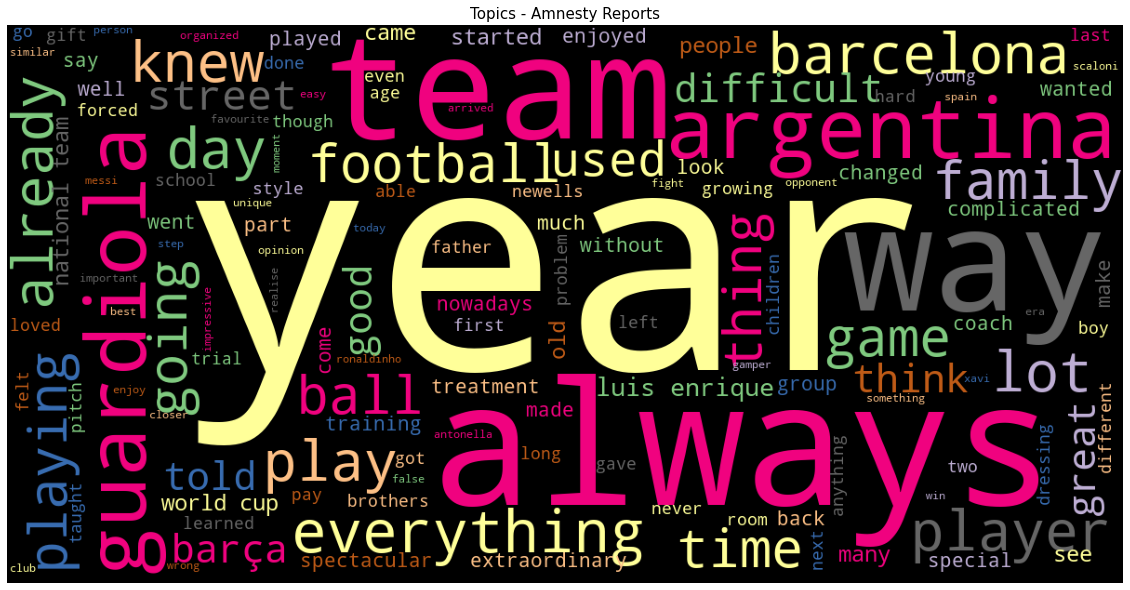

In [128]:
# show a wordcloud for Leo Messi interview
cloud = WordCloud(scale=3,
                      max_words=150,
                      colormap = 'Accent',
                      background_color='Black',
                      collocations=True,
                      contour_color='burgundy',
                      contour_width=3).generate_from_text(Interview_data['Preprocessed Text'][16])
plt.figure(figsize=(20,12))
plt.imshow(cloud)
plt.axis('off')
plt.title('Topics - Amnesty Reports',fontsize=15)
plt.show()

- We can see that Leo Messi interview talked mostly about argentina and his teammates.
- He also talked about his previous coaches as we can see he mensions 1) Guardiola and 2) Luis Enrique quite a lot.
- He also mentions world cup. Also he talked about his former football club Barcelona (barca).

##  b) Visualisation of Interview Text using WordCloud 

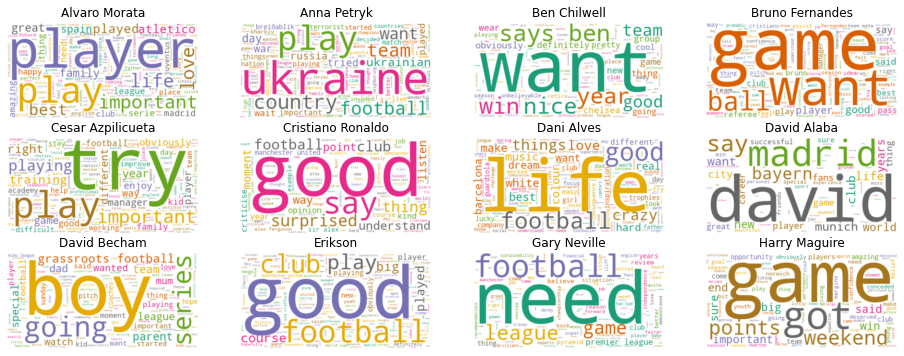

In [48]:
# show wordcloud for all the interviews
plt.rcParams['figure.figsize'] = [16,6]
full_names1 = full_names[0:12]
for index, celebrity in enumerate(data2.columns[0:12]):
    wc.generate(Interview_data['Preprocessed Text'][index])
    
    plt.subplot(3,4,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names1[index])

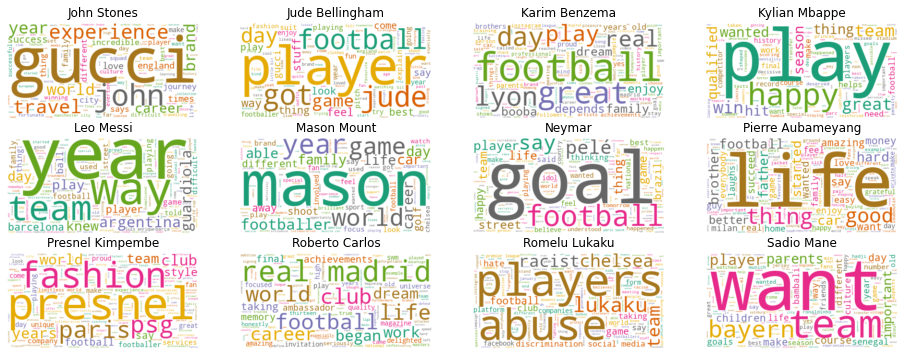

In [49]:
full_names2 = full_names[12:24]
for index, celebrity in enumerate(data2.columns[12:24]):
    wc.generate(Interview_data['Preprocessed Text'][index+12])
    
    plt.subplot(3,4,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names2[index])

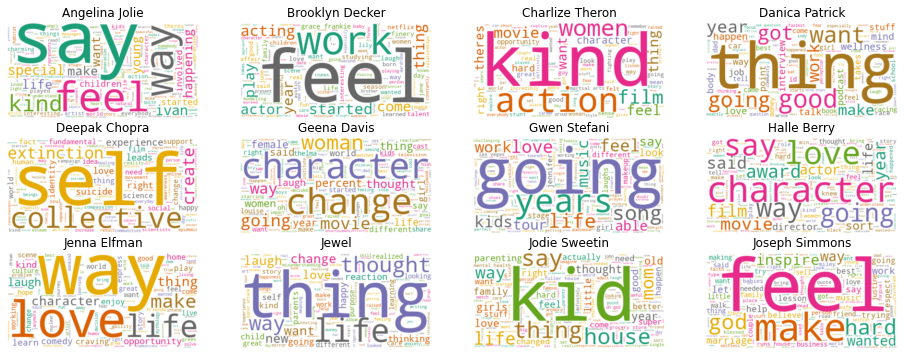

In [69]:
full_names3 = full_names[24:36]
for index, celebrity in enumerate(data2.columns[24:36]):
    wc.generate(Interview_data['Preprocessed Text'][index+24])
    
    plt.subplot(3,4,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names3[index])

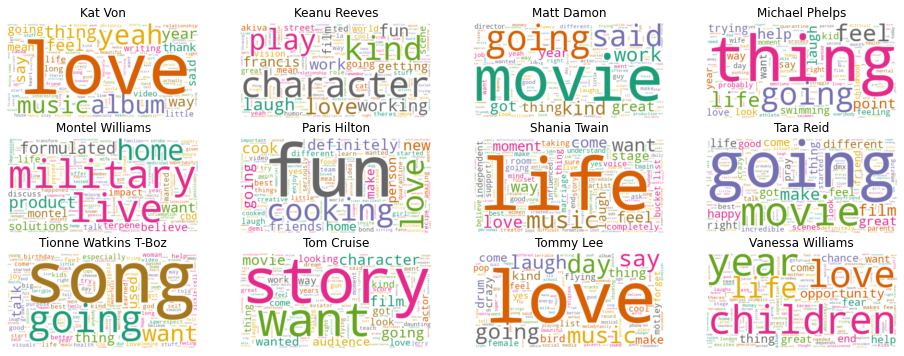

In [70]:
full_names4 = full_names[36:48]
for index, celebrity in enumerate(data2.columns[36:48]):
    wc.generate(Interview_data['Preprocessed Text'][index+36])
    
    plt.subplot(3,4,index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names4[index])

## c) Vocabulary

We want to find the number of unique words that each celebrity uses.

Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once

In [129]:
# get a list of unique words used by each celebrity
unique_list = []
for celebrity in data2.columns:
    uniques = data2[celebrity].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

In [130]:
# create a new dataframe that has celebrity names and unique_words_list
data_words =pd.DataFrame(list(zip(full_names, unique_list)), columns=['Celebrity', 'unique_words'])

In [131]:
# Add total words and profession in the new dataframe.
data_words['total_words'] = Interview_data["Origional Text"].apply(len)
data_words['Profession'] = Interview_data['Profession']

In [132]:
# create 2 data to sort by unique_words & by total_words
# To be used to plot  total unique words
data_unique_sort1 = data_words.sort_values(by='unique_words')

# To be used to plot total words count
data_unique_sort2 = data_words.sort_values(by='total_words')

In [133]:
# view new dataset for EDA
data_words.head()

,Celebrity,unique_words,total_words,Profession
0,Alvaro Morata,353,6102,Footballer
1,Anna Petryk,260,5082,Footballer
2,Ben Chilwell,457,10677,Footballer
3,Bruno Fernandes,533,15631,Footballer
4,Cesar Azpilicueta,361,7936,Footballer


Text(0.5, 1.0, 'Number of Unique Words')

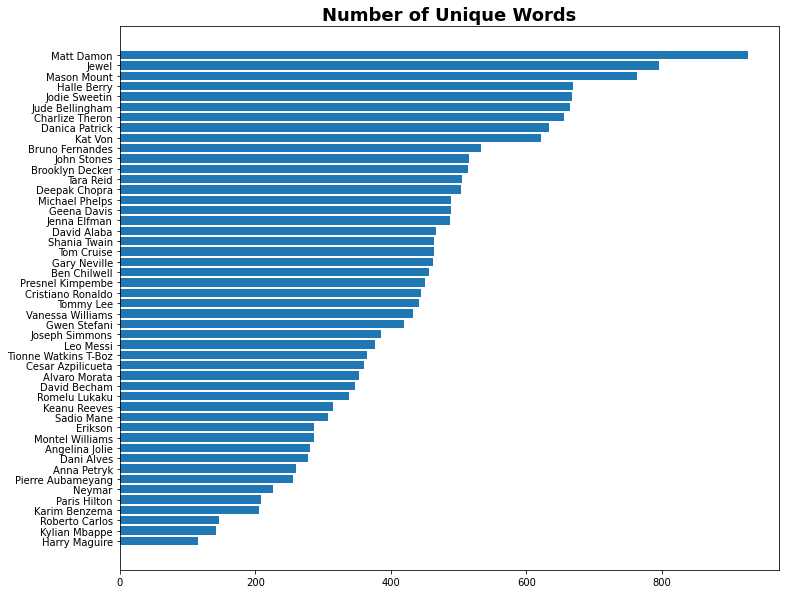

In [55]:
# Visualise our findings
plt.rcParams["figure.figsize"]=(26, 10)
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1,2,1)
plt.barh(y_pos, data_unique_sort1.unique_words,align='center')
plt.yticks(y_pos, data_unique_sort1.Celebrity)
plt.title('Number of Unique Words', fontsize=18, fontweight='bold')

From the graph, we can extract that Hollywood celebrities have the most unique words used as compared to Footballers. There are only 5 Footballers with most unique words in the Top 20 Unique words. **[Mason, Jude, Bruno, John, David]**. This is expected because Mason Mount, Jude Bellingham and John Stones are English footballers so ENGLISH is their  primary language. 

Also, most footballers appear in the Bottom 20 Unique words except for 5 Hollywood celebrities that comprise of that list. **[Paris Hilton, Angelina, Montel, Keanu, T-Boz]**

Text(0.5, 1.0, 'Total Words Used in Interview')

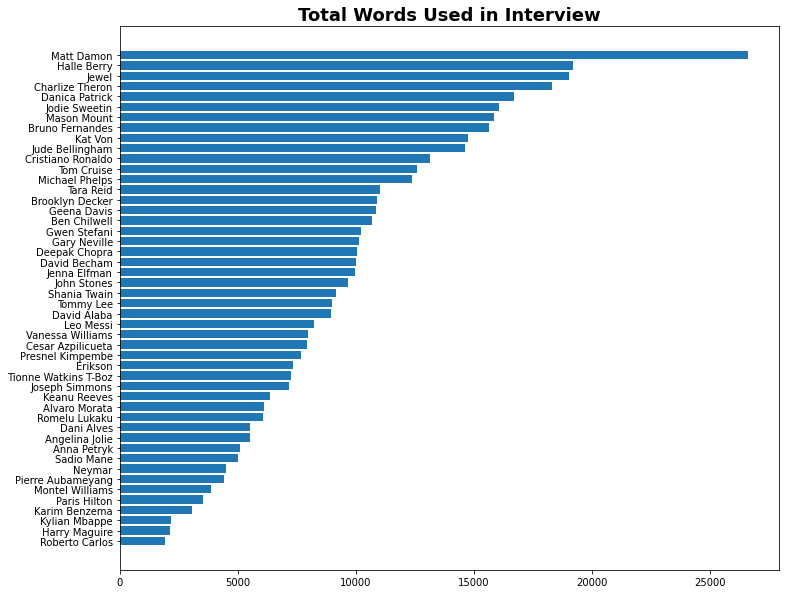

In [56]:
# second plot for total words
plt.rcParams["figure.figsize"]=(26, 10)
plt.subplot(1,2,2)
plt.barh(y_pos, data_unique_sort2.total_words, align='center')
plt.yticks(y_pos, data_unique_sort2.Celebrity)
plt.title('Total Words Used in Interview', fontsize=18,fontweight='bold')

The same is the case for **Total Words** used. Most Hollywood celebrities had longer interviews as compared to Footballers. 

Text(0.5, 1.0, 'Total Words Used in Interview')

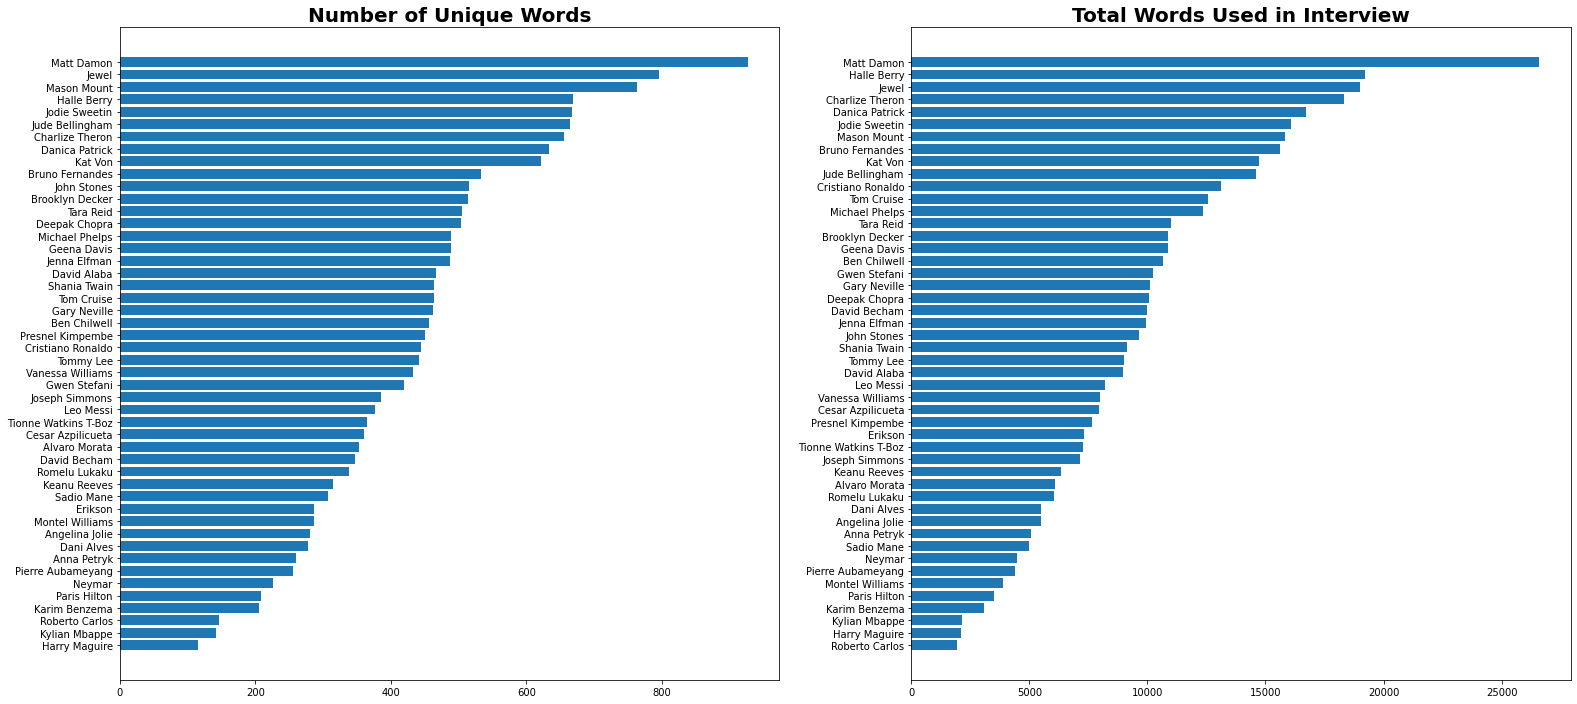

In [57]:
# Plot 2 graphs side by side
plt.rcParams["figure.figsize"]=(26, 12)
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1,2,1)
plt.barh(y_pos, data_unique_sort1.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort1.Celebrity)
plt.title('Number of Unique Words', fontsize=20, fontweight='bold')

plt.subplot(1,2,2)
plt.barh(y_pos, data_unique_sort2.total_words, align='center')
plt.yticks(y_pos, data_unique_sort2.Celebrity)
plt.title('Total Words Used in Interview', fontsize=20, fontweight='bold')

We also find insights that some celebrities have higher Total words but lower number of Unique Words which means that they used similar words more often in their Interview. Example,  **Cristiano Ronaldo** have a much higher total words used in the interview but however, he also has lower number of Unique Words when compared with [Deepak Chopra, Tom Cruise, Michael Phelps,Jenna Elfman, John Stones, Shania Twain]. 

We can give assumptions and conclude that the reason is that English is not his (Cristiano Ronaldo) first language so he uses simliar words / repeats most of the words in his interviews

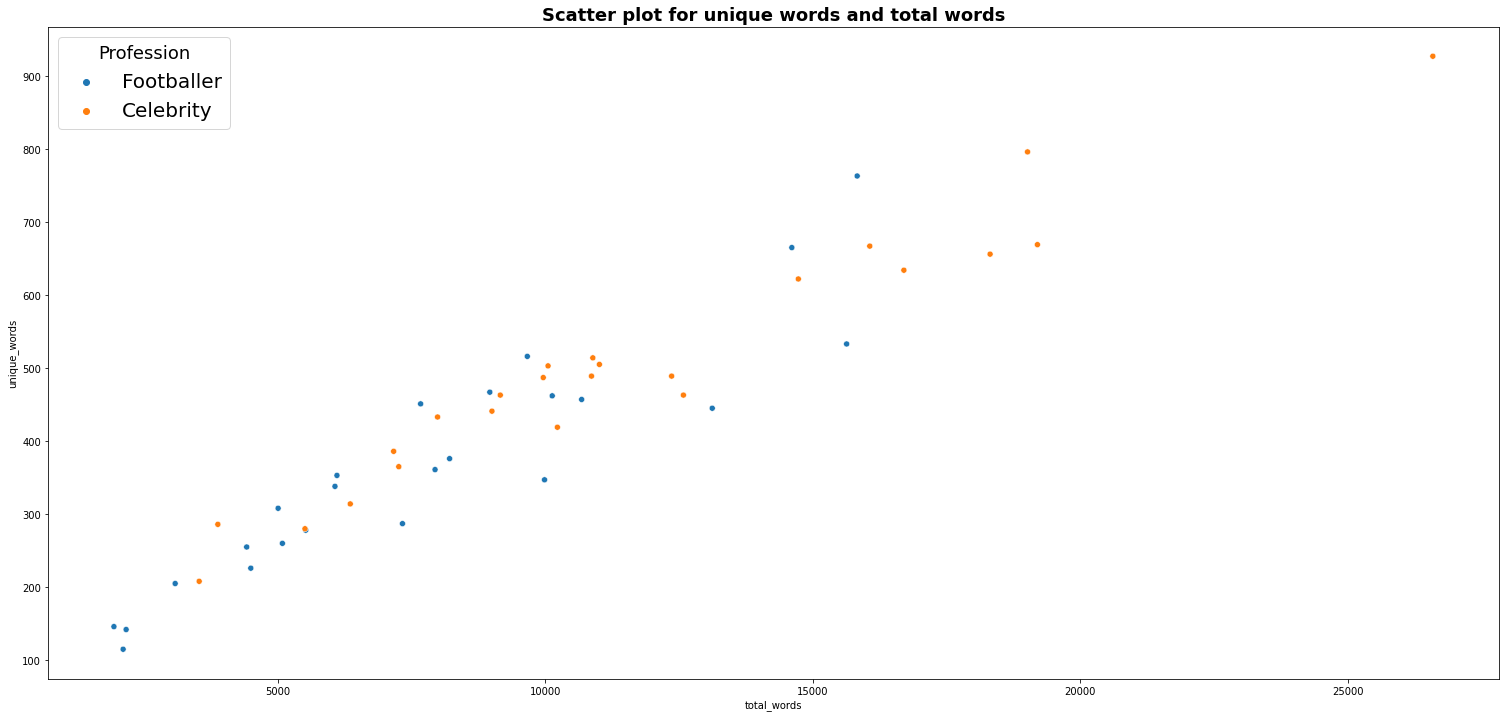

In [58]:
# scatter plot for unique words and total words
import seaborn as sns
sns.scatterplot(data = data_words, x=data_words.total_words, y=data_words.unique_words, hue=data_words.Profession)
plt.title('Scatter plot for unique words and total words', fontsize=18, fontweight='bold')
plt.legend(title="Profession", fontsize=20, title_fontsize=18)

## d) Amount of words about Family

 Here we want to identify if celebrities talked their families during their interviews. We achieve this by aggregating words that relate to family such as **Family, Kids, Father, Mother, Dad, Friends, Children**. These words will be classified as FAMILY WORDS.
 
 We also want to identify celebrities that included Positive words in their interview. For Positive words we included words like **Life, Love, Happy, Fun, Live**
 
 We will use the most common words again to identify these words i.e. Counter(words).most_common and add them together for each celebrity

In [59]:
# collect the words that we are interested in 1) words that describe family 2) Positive words
family_words = data2.transpose()[['family','kids','children','parents', 'father', 'dad','friends','families']]
positive_words = data2.transpose()[['life','love','happy','fun','live']]

# create a dataframe of 2 columns
data_fam_pos_words = pd.concat([family_words.family + family_words.kids + family_words.families + family_words.friends+ family_words.dad + family_words.children + family_words.parents + family_words.father, positive_words.life + positive_words.love + positive_words.happy + positive_words.fun + positive_words.live],axis=1)

# label the dataframe
data_fam_pos_words.columns = ['Fam_words', 'Pos_words']

In [60]:
# view the dataframe created
data_fam_pos_words.head() 

,Fam_words,Pos_words
Name,,
Alvaro Morata,14,18
Anna Petryk,5,5
Ben Chilwell,3,7
Bruno Fernandes,4,3
Cesar Azpilicueta,15,1


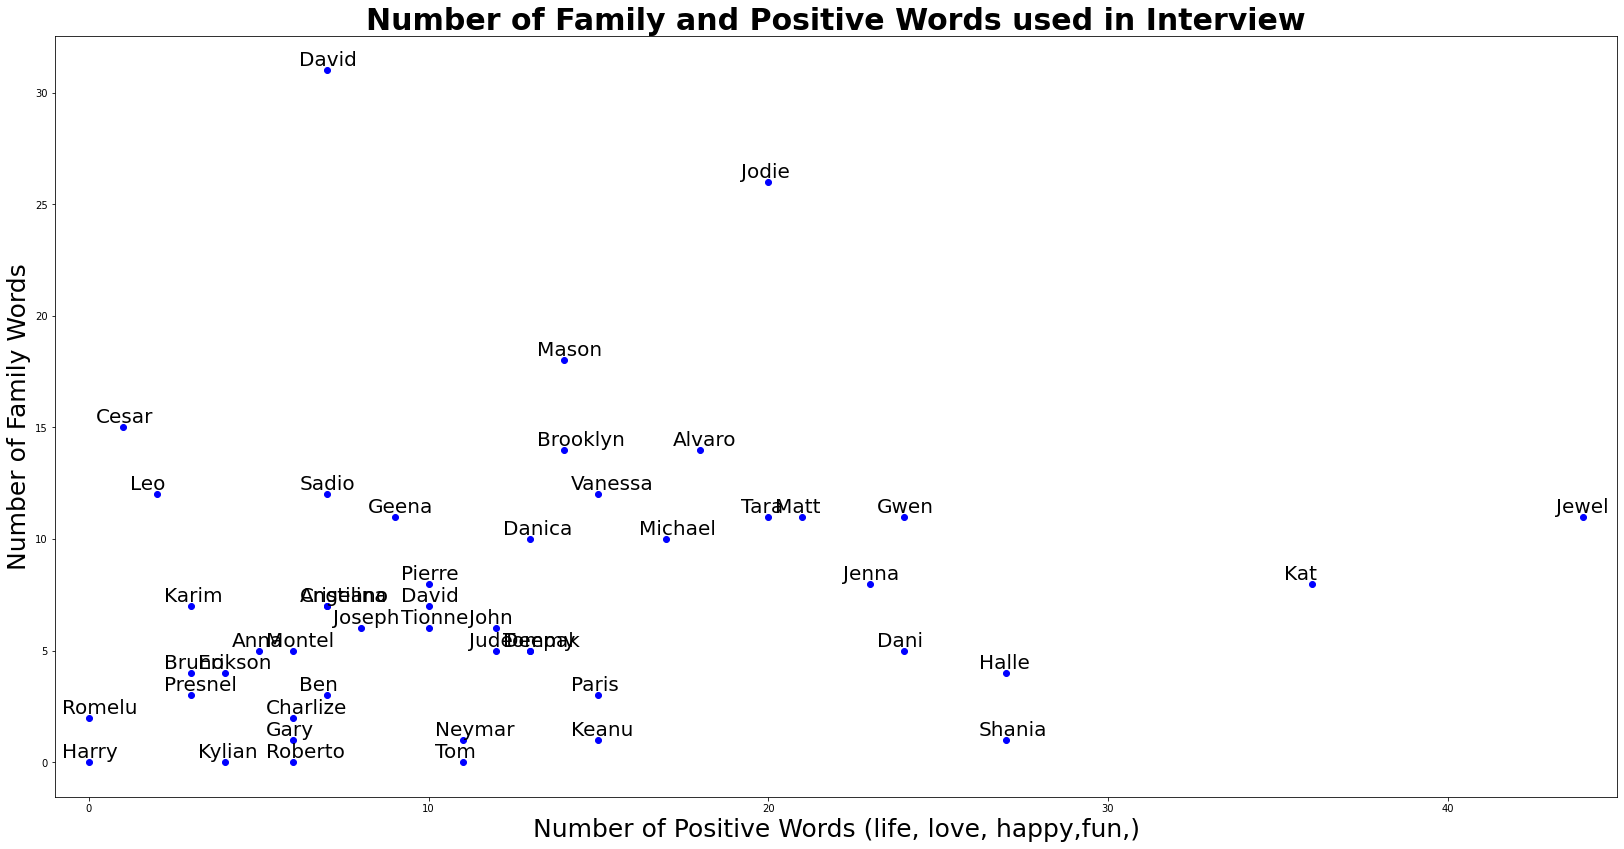

In [61]:
# PLOT
plt.rcParams["figure.figsize"]=(28, 14)
for i, celebrity in enumerate(data_fam_pos_words.index):
    y = data_fam_pos_words.Fam_words.loc[celebrity]
    x = data_fam_pos_words.Pos_words.loc[celebrity]
    plt.scatter(x, y, color='blue')
    plt.text(x-0.8, y+0.2, full_names[i].split()[0], fontsize=20)
    plt.xlim(-1,45)
    
plt.title('Number of Family and Positive Words used in Interview', fontsize=30, fontweight='bold')
plt.ylabel('Number of Family Words', fontsize=25)
plt.xlabel('Number of Positive Words (life, love, happy,fun,)', fontsize=25)
plt.show()

The graph helps us to identify which celebrities in their interview talk more about their Families and uses Positive words. We realise that David Alaba, Mason Mount, Jodie Alba in their interviews talked more about family and we realise that Jewel, Kat Von mostly used Positive words in their interviews.  

Other Celebrities, particulary footballers such as Romelu Lukaku, Harry Maguire, Kylian Mbappe, Presnel Kimpembe neither used much words about Family or Positive words.

# 3. Conclusion

The whole process of the EDA is to verify if our data makes sense. We were able to find some interesting insights from just EDA. Part 2 of this project will introduce more **Advanced Analysis techniques** that are more specifically designed for Text data. 